In [1]:
## imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import folium
import datetime
import altair as alt
from collections import OrderedDict
from matplotlib.ticker import PercentFormatter
import pickle5
%matplotlib inline

In [2]:
# get data - charging times
df = pd.read_pickle("../data/Electric_Vehicle_Charging_Station_Energy_Consumption_cleaned_covid.pkl")
df.head()

,Station_Name,Station_Address,City,State_Province,Postal_Code,Transaction_Date,Transaction_Start_Time,Charging_Time__minutes_,Energy__kWh_,GHG_Savings__kg_,...,Transaction_Date_Datetime,start_Datetime,end_Datetime,year,idle_time_minutes,latitude,longitude,weekday,weekday_name,distance_center_km
0,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 17:43:00+00,128.0,2.84,1.19,...,2018-01-31 00:00:00+00:00,2018-01-31 17:43:00,2018-01-31 19:51:00,2018,929.0,40.018482,-105.281066,2,Wednesday,0.152203
1,COMM VITALITY / 1000WALNUT1,900 Walnut St,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 17:16:00+00,68.0,5.66,2.38,...,2018-01-31 00:00:00+00:00,2018-01-31 17:16:00,2018-01-31 18:24:00,2018,228.0,40.015994,-105.282473,2,Wednesday,0.378654
2,BOULDER / REC CENTER ST2,1305-1335 Gillaspie Dr,Boulder,Colorado,80305,2018/01/31 00:00:00+00,2021/01/21 13:52:00+00,73.0,3.94,1.65,...,2018-01-31 00:00:00+00:00,2018-01-31 13:52:00,2018-01-31 15:05:00,2018,2356.0,39.974881,-105.249219,2,Wednesday,5.638648
3,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 13:54:00+00,40.0,4.42,1.86,...,2018-01-31 00:00:00+00:00,2018-01-31 13:54:00,2018-01-31 14:34:00,2018,1259.0,40.000148,-105.282437,2,Wednesday,2.096847
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 11:51:00+00,42.0,4.60,1.93,...,2018-01-31 00:00:00+00:00,2018-01-31 11:51:00,2018-01-31 12:33:00,2018,81.0,40.000148,-105.282437,2,Wednesday,2.096847


## Histogram and charging times

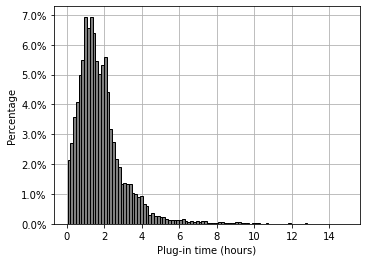

In [3]:
data = df['Charging_Time__minutes_']/60

fig, ax = plt.subplots(figsize=(5.5,4))

ax.grid(True)
ax.set_axisbelow(True)
ax.hist(data,weights=np.ones(len(data))/len(data), bins=100, color='grey', edgecolor='k')
fig.gca().yaxis.set_major_formatter(PercentFormatter(1))
#ax.axvline(1.5)
ax.set_xlabel('Plug-in time (hours)')
ax.set_ylabel("Percentage")
#plt.savefig('../visualization/chargtime_histogram.pgf',bbox_inches='tight')
plt.show()

In [4]:
print("0-2h:", len(df[df['Charging_Time__minutes_'] <= 2*60])/len(df)*100)
print("2-6h:", len(df[(df['Charging_Time__minutes_'] > 2*60) & (df['Charging_Time__minutes_'] <= 6*60)])/len(df))
print("6+h:", len(df[df['Charging_Time__minutes_'] > 6*60])/len(df))

0-2h: 66.84765649379017
2-6h: 0.31573363290270234
6+h: 0.01578980215939587


## Life-times

In [5]:
with open("../data/under_utilization_combinedStations.pkl", "rb") as fh:
    df = pickle5.load(fh)

In [6]:
df.shape

(12711, 10)

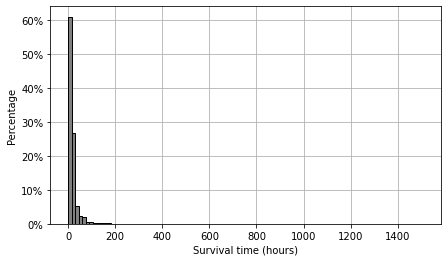

In [7]:
data = df['life_time']/60

fig, ax = plt.subplots(figsize=(7,4))

ax.grid(True)
ax.set_axisbelow(True)
ax.hist(data,weights=np.ones(len(data))/len(data), bins=100, color='grey', edgecolor='k')
fig.gca().yaxis.set_major_formatter(PercentFormatter(1))
#ax.axvline(1.5)
ax.set_xlabel('Survival time (hours)')
ax.set_ylabel("Percentage")
plt.show()

In [8]:
print("Max survival time:", max(data))

Max survival time: 1508.0916666666667


In [9]:
print("Percentage of observations with life-time above 100h",len(data[data>100])/len(data)*100)
print("Percentage of observations with life-time below 2h",len(data[data<=2])/len(data)*100)
print("Percentage of observations with life-time 2-10h",len(data[(data>2) & (data<=10)])/len(data)*100)
print("Percentage of observations with life-time 10-24h", len(data[(data>10) & (data<=24)])/len(data)*100)
print("Percentage of observations with life-time above 24h",len(data[data>24])/len(data)*100)

Percentage of observations with life-time above 100h 1.5970419321847218
Percentage of observations with life-time below 2h 25.02556840531823
Percentage of observations with life-time 2-10h 24.199512233498545
Percentage of observations with life-time 10-24h 34.6628904098812
Percentage of observations with life-time above 24h 16.112028951302023


In [10]:
print("Observationa above 24 h accounts for", sum(data[data>24])/sum(data)*100)

Observationa above 24 h accounts for 57.78504566571117


No handles with labels found to put in legend.


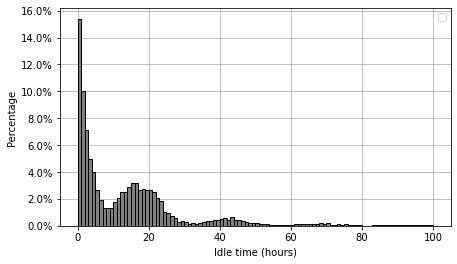

In [11]:
data = df['life_time']/60
data = data[data < 100]

fig, ax = plt.subplots(figsize=(7,4))

ax.grid(True)
ax.set_axisbelow(True)
ax.hist(data,weights=np.ones(len(data))/len(data), bins=100, color='grey', edgecolor='k')
fig.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.legend()
ax.set_xlabel('Idle time (hours)')
ax.set_ylabel("Percentage")
#plt.savefig('../visualization/survivaltime_histogram.pgf',bbox_inches='tight')
plt.show()

Make a definition to label observations which segment they belong to.

In [12]:
def segment_label(X):
    if X <= 2*60:
        return '2H'
    if (X > 2*60) and (X <= 8*60):
        return '2H-8H'
    if (X > 8*60) and (X <= 24*60):
        return '8H-24H'
    if (X > 24*60):
        return '24H+'

In [13]:
df['segment'] = df['life_time'].apply(segment_label)

In [14]:
df['segment'].value_counts()

8H-24H    4740
2H        3181
2H-8H     2742
24H+      2048
Name: segment, dtype: int64

## Plot

In [15]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

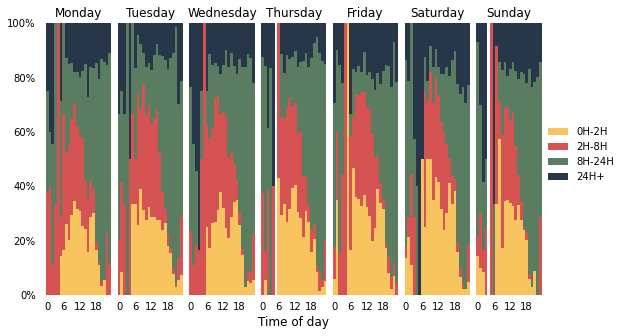

In [19]:
hours = np.arange(0,24)
segments = df.segment.unique()

fig, axs = plt.subplots(1,7, figsize=(9,5), sharey=True, sharex = True)

wid = 1 # width for bars
colors = ["#F7C45F", "#D65353", "#5A7C60", "#28364A"] # set colors

for i in range(0,len(weekdays)):
    segments = df.segment.unique()

    ## Create dictionary for segments
    keyDict = {'2H','2H-8H','8H-24H','24H+'}
    seg_dict = dict([(key, []) for key in keyDict])
    seg_dict_perc = dict([(key, []) for key in keyDict])

    temp = df[df['weekday_b_name'] == weekdays[i]]
    
    for hour in hours:
        temp2 = temp[temp['hour_b'] == hour]
        counts = temp2['segment'].value_counts()

        ## Check if a segment is in the counts
        for seg in segments:
            if seg in counts.index:
                seg_dict[seg].append(counts[seg])
                seg_dict_perc[seg].append(counts[seg]/sum(counts))
            else:
                seg_dict[seg].append(0)
                seg_dict_perc[seg].append(0)
    
    ## Plot
    axs[i].bar(hours, seg_dict_perc['2H'], label='0H-2H', width=wid, color=colors[0])
    axs[i].bar(hours, seg_dict_perc['2H-8H'], bottom=seg_dict_perc['2H'], label='2H-8H', width=wid, color=colors[1])
    axs[i].bar(hours, seg_dict_perc['8H-24H'], bottom=[seg_dict_perc['2H'][i] +
                                               seg_dict_perc['2H-8H'][i] for i in range(len(seg_dict_perc['2H']))], label='8H-24H', width=wid, color=colors[2])
    axs[i].bar(hours, seg_dict_perc['24H+'], bottom=[seg_dict_perc['2H'][i] + 
                                             seg_dict_perc['2H-8H'][i] + 
                                             seg_dict_perc['8H-24H'][i] for i in range(len(seg_dict_perc['2H']))], label='24H+', width=wid, color=colors[3])
    #axs[i].axis('off')
    axs[i].set_title(weekdays[i])
    axs[i].set_xticks(np.arange(0,24, step=6))
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].xaxis.set_ticks_position('none') 
    axs[i].yaxis.set_ticks_position('none') 

axs[1].legend(loc='upper center', bbox_to_anchor=(6.5, 0.65), frameon=False, prop={"size":10})
#plt.suptitle("Distribution of survival times over the week", size = 14)
## Set common x-axis and y-axis
fig.gca().yaxis.set_major_formatter(PercentFormatter(1))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Time of day", size=12)
plt.subplots_adjust(wspace=0, hspace=0) # adjust spacing between plots
plt.savefig("../visualization/areaplot.pdf", bbox_inches='tight')
plt.show()